# Linear Regression

## 1. Load data

In [3]:
# install.packages("carData")

In [5]:
library(carData)

In [7]:
?Prestige

Prestige {carData},R Documentation


In [9]:
data <- Prestige
head(data)

,education,income,women,prestige,census,type
,<dbl>,<int>,<dbl>,<dbl>,<int>,<fct>
gov.administrators,13.11,12351,11.16,68.8,1113,prof
general.managers,12.26,25879,4.02,69.1,1130,prof
accountants,12.77,9271,15.70,63.4,1171,prof
purchasing.officers,11.42,8865,9.11,56.8,1175,prof
chemists,14.62,8403,11.68,73.5,2111,prof
physicists,15.64,11030,5.13,77.6,2113,prof


In [11]:
str(data)

'data.frame':	102 obs. of  6 variables:
 $ education: num  13.1 12.3 12.8 11.4 14.6 ...
 $ income   : int  12351 25879 9271 8865 8403 11030 8258 14163 11377 11023 ...
 $ women    : num  11.16 4.02 15.7 9.11 11.68 ...
 $ prestige : num  68.8 69.1 63.4 56.8 73.5 77.6 72.6 78.1 73.1 68.8 ...
 $ census   : int  1113 1130 1171 1175 2111 2113 2133 2141 2143 2153 ...
 $ type     : Factor w/ 3 levels "bc","prof","wc": 2 2 2 2 2 2 2 2 2 2 ...


In [13]:
library(dplyr)

In [15]:
data |> select(-type) |> cor()

,education,income,women,prestige,census
education,1.00000000,0.5775802,0.06185286,0.8501769,-0.8230882
income,0.57758023,1.0000000,-0.44105927,0.7149057,-0.3610023
women,0.06185286,-0.4410593,1.00000000,-0.1183342,-0.2270028
prestige,0.85017689,0.7149057,-0.11833419,1.0000000,-0.6345103
census,-0.82308821,-0.3610023,-0.22700277,-0.6345103,1.0000000


## 2.  Check missing data

In [17]:
anyNA(data)

[1] TRUE

In [19]:
library(mice)

,education,income,women,prestige,census,type,
98,1,1,1,1,1,1,0
4,1,1,1,1,1,0,1
,0,0,0,0,0,4,4


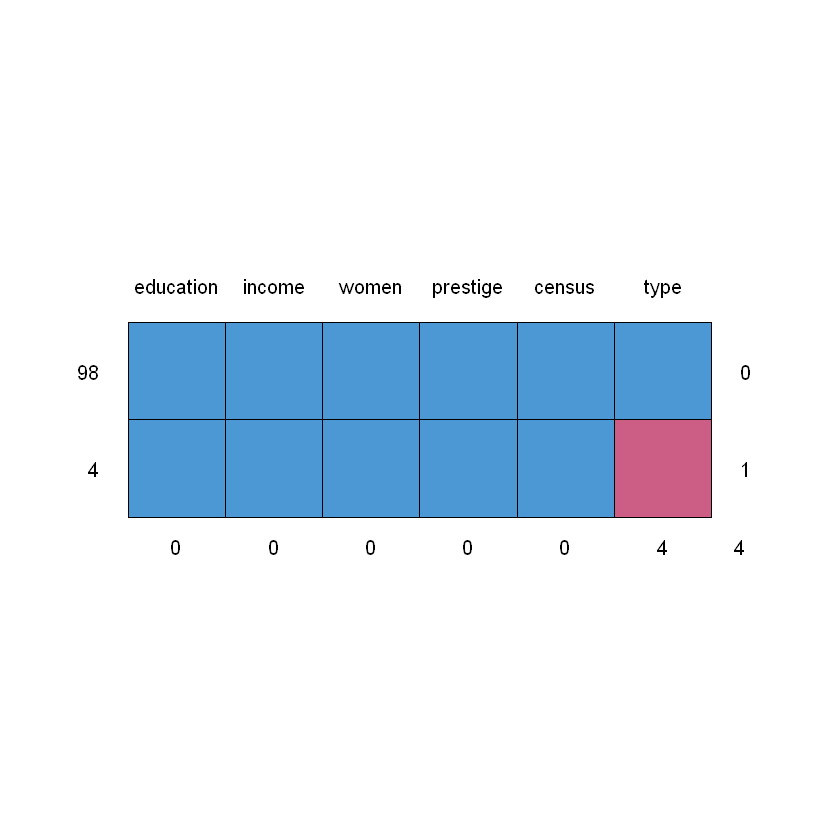

In [21]:
md.pattern(data)

In [22]:
table(data$type)


  bc prof   wc 
  44   31   23 

In [28]:
data <- data |>
    mutate(
        type = as.character(type),
        type = ifelse(is.na(type), "bc", type))
table(data$type)


  bc prof   wc 
  48   31   23 

In [30]:
anyNA(data)

[1] FALSE

## 3. EDA

In [32]:
library(ggplot2)

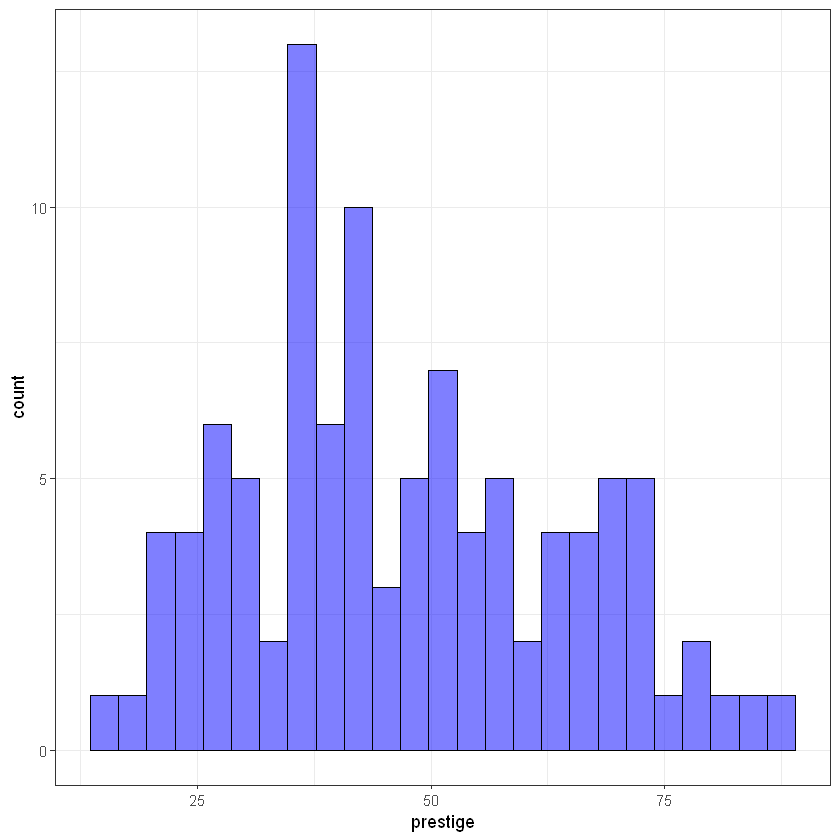

In [36]:
ggplot(data, aes(prestige)) +
    geom_histogram(bins = 25, alpha = 0.5, fill="blue", color="black") +
    theme_bw()

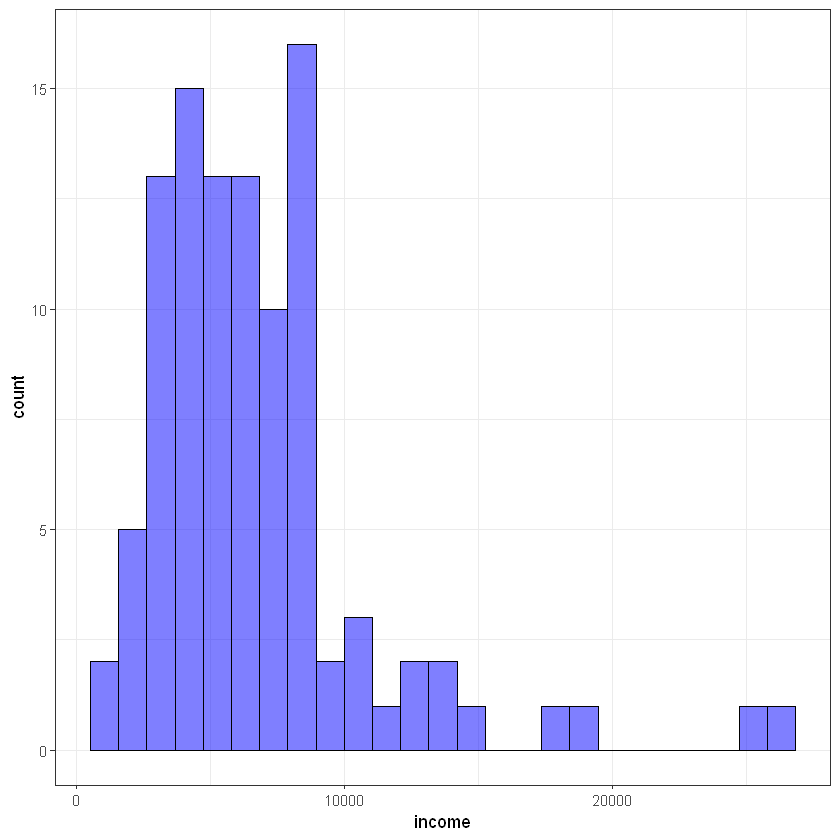

In [38]:
ggplot(data, aes(income)) +
    geom_histogram(bins = 25, alpha = 0.5, fill="blue", color="black") +
    theme_bw()

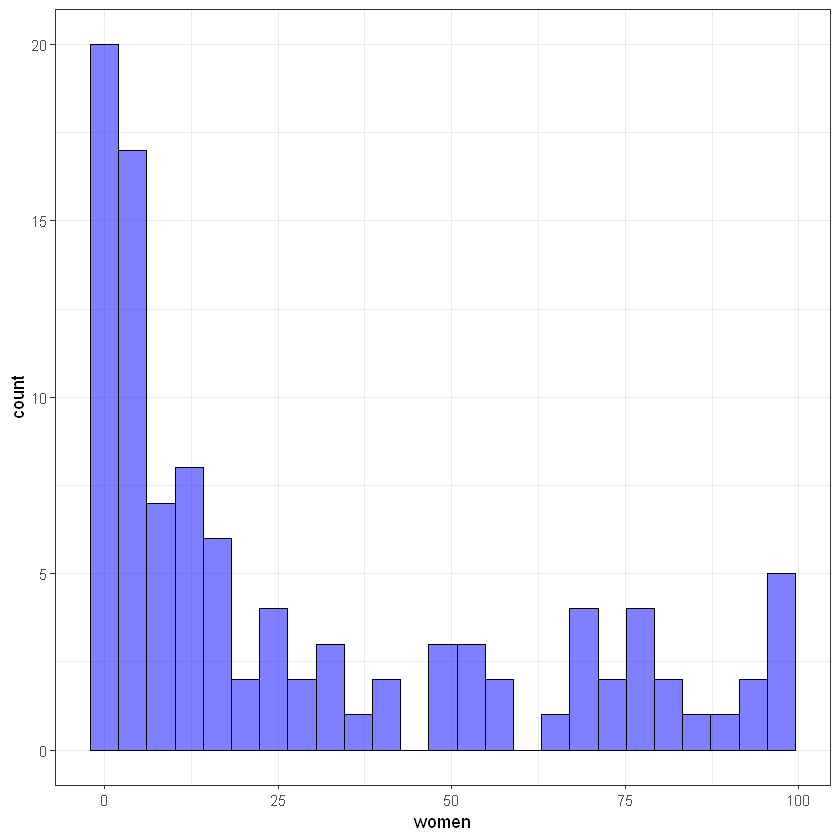

In [40]:
ggplot(data, aes(women)) +
    geom_histogram(bins = 25, alpha = 0.5, fill="blue", color="black") +
    theme_bw()

## 4. Data Preprocessing

## 5. Train/test split

In [77]:
set.seed(2024)

train_size <- round(0.7*nrow(data))
train_index <- sample(nrow(data), size = train_size)
length(train_index)

[1] 71

In [69]:
train_index

[1]  66  37  45  60  17  32  29  11  16  96  62  14  34  26  44  50  89  97   1
[20]  75  35  81  28  48  43  58  20  55  99   4   7  52  57  67  25  90  70  49
[39]  54  86  65   3  68  84   6  76   9  15  13  94  78  69  92  88   5  53  77
[58]  61  74  33  95  19  30  87  56 100  93 102  91  47  73

In [78]:
#data <- data |> select(-census)
train <- data[train_index,]
test <- data[-train_index,]

In [79]:
head(train)

,education,income,women,prestige,type
,<dbl>,<int>,<dbl>,<dbl>,<chr>
elevator.operators,7.58,3582,30.08,20.1,bc
bookkeepers,11.32,4348,68.24,49.4,wc
telephone.operators,10.51,3161,96.14,38.1,wc
cooks,7.74,3116,52.00,29.7,bc
lawyers,15.77,19263,5.13,82.3,prof
commercial.artists,11.09,6197,21.03,57.2,prof


## 6. Model building

$prestige = a_0 + a_1*income$

In [80]:
model1 <- lm(prestige ~ income, data = train)
summary(model1)


Call:
lm(formula = prestige ~ income, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-17.877  -8.028  -2.094   6.279  33.998 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.144e+01  2.876e+00   7.453 1.99e-10 ***
income      3.706e-03  3.846e-04   9.636 2.10e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 11.15 on 69 degrees of freedom
Multiple R-squared:  0.5737,	Adjusted R-squared:  0.5675 
F-statistic: 92.85 on 1 and 69 DF,  p-value: 2.103e-14


In [81]:
library(broom)

In [82]:
tidy(model1)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),21.437327015,2.8762371409,7.453254,1.994272e-10
income,0.003705569,0.0003845563,9.635960,2.103369e-14


$prestige = 27.7175 + 0.0027*income$

In [83]:
model2 <- lm(prestige ~ income + education, data = train)
summary(model2)


Call:
lm(formula = prestige ~ income + education, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-17.7525  -4.5878   0.4582   4.7086  17.3600 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5.6264724  3.7225239  -1.511    0.135    
income       0.0017458  0.0003512   4.972 4.76e-06 ***
education    3.8021103  0.4408681   8.624 1.61e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.762 on 68 degrees of freedom
Multiple R-squared:  0.7964,	Adjusted R-squared:  0.7904 
F-statistic:   133 on 2 and 68 DF,  p-value: < 2.2e-16


In [85]:
model3 <- lm(prestige ~ income + log(education), data = train)
summary(model3)


Call:
lm(formula = prestige ~ income + log(education), data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-18.0756  -5.3409   0.2461   4.6585  18.9241 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -5.470e+01  9.643e+00  -5.673 3.14e-07 ***
income          1.919e-03  3.541e-04   5.419 8.53e-07 ***
log(education)  3.791e+01  4.689e+00   8.084 1.54e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 8.021 on 68 degrees of freedom
Multiple R-squared:  0.7826,	Adjusted R-squared:  0.7762 
F-statistic: 122.4 on 2 and 68 DF,  p-value: < 2.2e-16


In [97]:
model3 <- lm(prestige ~ log(income) + log(education), data = train)
summary(model3)


Call:
lm(formula = prestige ~ log(income) + log(education), data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.633  -5.746   0.257   4.155  19.322 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -160.578     13.909 -11.545  < 2e-16 ***
log(income)      13.915      1.963   7.089 9.82e-10 ***
log(education)   37.051      4.076   9.091 2.31e-13 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.278 on 68 degrees of freedom
Multiple R-squared:  0.821,	Adjusted R-squared:  0.8157 
F-statistic: 155.9 on 2 and 68 DF,  p-value: < 2.2e-16


In [91]:
model4 <- lm(prestige ~ log(income) + education, data = train)
summary(model4)


Call:
lm(formula = prestige ~ log(income) + education, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.6057  -4.8349   0.2008   4.3059  17.8286 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -106.6386    14.4776  -7.366 3.10e-10 ***
log(income)   13.1314     1.8964   6.925 1.94e-09 ***
education      3.6879     0.3733   9.880 8.92e-15 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.941 on 68 degrees of freedom
Multiple R-squared:  0.8372,	Adjusted R-squared:  0.8324 
F-statistic: 174.8 on 2 and 68 DF,  p-value: < 2.2e-16


In [93]:
library(modelr)

In [101]:
rdf <- data.frame(Name = "Income",
                 R2_TR = rsquare(model1, train),
                 R2_TE = rsquare(model1, test))
rdf

Name,R2_TR,R2_TE
<chr>,<dbl>,<dbl>
Income,0.5736839,0.2501919


In [102]:
rdf <- rdf |> bind_rows(data.frame(Name = "Income + Education",
                 R2_TR = rsquare(model2, train),
                 R2_TE = rsquare(model2, test))) |>
bind_rows(data.frame(Name = "Income + L_Education",
                 R2_TR = rsquare(model3, train),
                 R2_TE = rsquare(model3, test))) |>
bind_rows(data.frame(Name = "L_Income + L_Education",
                 R2_TR = rsquare(model4, train),
                 R2_TE = rsquare(model4, test)))
rdf

Name,R2_TR,R2_TE
<chr>,<dbl>,<dbl>
Income,0.5736839,0.2501919
Income + Education,0.7963876,0.7810138
Income + L_Education,0.8210033,0.7886101
L_Income + L_Education,0.8371824,0.8075536


In [106]:
# install.packages("car")

In [109]:
library(car)

In [112]:
vif(model2)

income education 
 1.720503  1.720503

In [114]:
vif(model3)

log(income) log(education) 
      1.503299       1.503299

In [116]:
vif(model4)

log(income)   education 
   1.542297    1.542297

In [124]:
model5 <- lm(prestige ~ log(income) + education + sqrt(income) + education*income, data = train)
summary(model5)
vif(model5)


Call:
lm(formula = prestige ~ log(income) + education + sqrt(income) + 
    education * income, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.4779  -4.9309   0.3404   4.4836  18.5550 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -2.186e+02  1.678e+02  -1.303  0.19727    
log(income)       3.164e+01  3.016e+01   1.049  0.29807    
education         4.581e+00  1.178e+00   3.889  0.00024 ***
sqrt(income)     -9.805e-01  1.819e+00  -0.539  0.59180    
income            4.199e-03  7.927e-03   0.530  0.59811    
education:income -1.096e-04  1.664e-04  -0.659  0.51234    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.001 on 65 degrees of freedom
Multiple R-squared:  0.8417,	Adjusted R-squared:  0.8295 
F-statistic: 69.12 on 5 and 65 DF,  p-value: < 2.2e-16


there are higher-order terms (interactions) in this model
consider setting type = 'predictor'; see ?vif



log(income)        education     sqrt(income)           income 
       383.60262         15.10233       1987.65221       1077.99193 
education:income 
       130.94143

In [120]:
rsquare(model5, test)

[1] 0.783956

In [122]:
vif(model5)

there are higher-order terms (interactions) in this model
consider setting type = 'predictor'; see ?vif



log(income)        education           income education:income 
       14.296455         8.687454        93.561638        77.912459

In [126]:
model5 <- lm(prestige ~ log(income) + education + sqrt(income), data = train)
summary(model5)
vif(model5)


Call:
lm(formula = prestige ~ log(income) + education + sqrt(income), 
    data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.3615  -4.6652   0.5413   4.3811  17.8757 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -165.0028    50.5326  -3.265  0.00172 ** 
log(income)    21.9640     7.5688   2.902  0.00502 ** 
education       3.8539     0.3967   9.715 2.04e-14 ***
sqrt(income)   -0.2527     0.2097  -1.205  0.23238    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.918 on 67 degrees of freedom
Multiple R-squared:  0.8406,	Adjusted R-squared:  0.8335 
F-statistic: 117.8 on 3 and 67 DF,  p-value: < 2.2e-16


log(income)    education sqrt(income) 
   24.732080     1.753621    27.026464

In [128]:
model5 <- lm(prestige ~ education + sqrt(income), data = train)
summary(model5)
vif(model5)


Call:
lm(formula = prestige ~ education + sqrt(income), data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.6390  -4.6028   0.3958   4.6840  17.7187 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -18.73390    3.78942  -4.944 5.29e-06 ***
education      3.62676    0.40957   8.855 6.17e-13 ***
sqrt(income)   0.33646    0.05514   6.102 5.63e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.286 on 68 degrees of freedom
Multiple R-squared:  0.8206,	Adjusted R-squared:  0.8153 
F-statistic: 155.5 on 2 and 68 DF,  p-value: < 2.2e-16


education sqrt(income) 
    1.685375     1.685375

In [130]:
model5 <- lm(prestige ~ log(income) + education + type, data = train)
summary(model5)


Call:
lm(formula = prestige ~ log(income) + education + type, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.0985  -3.6555   0.7718   4.4442  15.7991 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -90.2087    14.8241  -6.085 6.59e-08 ***
log(income)  12.4132     1.8337   6.770 4.15e-09 ***
education     2.4436     0.6775   3.607 0.000597 ***
typeprof      9.6341     4.0854   2.358 0.021337 *  
typewc        0.3103     2.6660   0.116 0.907688    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.6 on 66 degrees of freedom
Multiple R-squared:  0.8571,	Adjusted R-squared:  0.8485 
F-statistic: 98.98 on 4 and 66 DF,  p-value: < 2.2e-16


In [131]:
rdf <- rdf |> bind_rows(data.frame(Name = "L_Income + L_Education + Type",
                 R2_TR = rsquare(model5, train),
                 R2_TE = rsquare(model5, test)))
rdf

Name,R2_TR,R2_TE
<chr>,<dbl>,<dbl>
Income,0.5736839,0.2501919
Income + Education,0.7963876,0.7810138
Income + L_Education,0.8210033,0.7886101
L_Income + L_Education,0.8371824,0.8075536
L_Income + L_Education + Type,0.8571179,0.8167272


In [132]:
model6 <- lm(prestige ~ log(income) + education + type + women, data = train)
summary(model6)


Call:
lm(formula = prestige ~ log(income) + education + type + women, 
    data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.7812  -3.3768   0.4504   4.2578  16.6904 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -102.26340   18.00867  -5.679 3.43e-07 ***
log(income)   13.77908    2.16833   6.355 2.35e-08 ***
education      2.41527    0.67604   3.573 0.000672 ***
typeprof       8.70872    4.14969   2.099 0.039738 *  
typewc        -0.98405    2.87879  -0.342 0.733585    
women          0.04344    0.03706   1.172 0.245477    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.582 on 65 degrees of freedom
Multiple R-squared:  0.8601,	Adjusted R-squared:  0.8493 
F-statistic: 79.91 on 5 and 65 DF,  p-value: < 2.2e-16


In [133]:
rdf <- rdf |> bind_rows(data.frame(Name = "L_Income + L_Education + Type + Women",
                 R2_TR = rsquare(model6, train),
                 R2_TE = rsquare(model6, test)))
rdf

Name,R2_TR,R2_TE
<chr>,<dbl>,<dbl>
Income,0.5736839,0.2501919
Income + Education,0.7963876,0.7810138
Income + L_Education,0.8210033,0.7886101
L_Income + L_Education,0.8371824,0.8075536
L_Income + L_Education + Type,0.8571179,0.8167272
L_Income + L_Education + Type + Women,0.8600748,0.8346741


## 7. Feature selection

### 7.1. Regression subsets

In [136]:
# install.packages("leaps")

In [138]:
library(leaps)

In [150]:
best_model <- regsubsets(prestige ~ log(income) + education + type + sqrt(women), data = train)

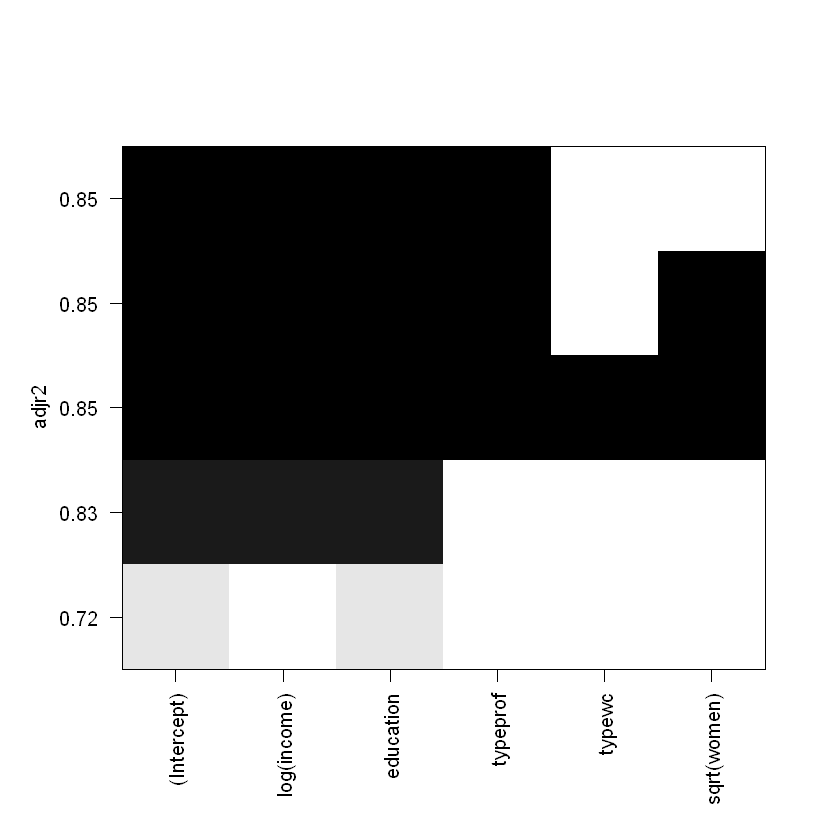

In [152]:
plot(best_model, scale = "adjr2")

In [154]:
results <- summary(best_model)
model_index <- which.max(results$adjr2)
model_info <- results$which[model_index,]
as.data.frame(model_info)

,model_info
,<lgl>
(Intercept),TRUE
log(income),TRUE
education,TRUE
typeprof,TRUE
typewc,FALSE
sqrt(women),FALSE


### 7.2 Stepwise